In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
# pip install ccxt

In [3]:
import ccxt

In [4]:
import time

In [39]:
# European Option Class


In [40]:
class Hedge:
    def __init__(self, api_id, api_secret, symbol="RLY", threshold = 0.01):
        """
        api_id: string
                API ID
        api_secret: string
                API password
        symbol: string (default as "RLY")
                The asset to hedge the option
        threshold: float(default as 0.05)
                The maximum delta exposure. The default value is 0.05, which means that the portfolio delta is between [-0.05, 0.05]. 
                Any number outside this range will trigger re-hedge. 
        """
        self.load = ccxt.deribit({'apiKey':api_id, 'secret': api_secret})
        self.symbol = symbol
        self.threshold = abs(float(threshold))
    
    def current_delta(self):
        """
        get the current portfolio delta
        """
        return self.load.current_delta()    # load.current_delta() functions use market information as input to calculate delta.
    
    def delta_hedge(self):
        """
        Hedge the portfolio to make the delta = 0
        """
        """
        option object, for loop for different instrument, liquidity provider (conservative stack and skew)
        """
        option.delta_update()    # update delta number for each time the functions called
        current_delta = option.current_delta()
        if current_delta < -self.threshold: sign = 'buy'
        if current_delta > self.threshold: sign = 'sell'
        # 1. Check if the delta is out of threhold
        # 2. Put limit orders: put more aggressive sell and more conservative bid
        # 3. Check if the limit orders partially filled, if yes, update the fair value or order book to most recent
        # 4. redo step 1
        # 5. if delta is still out of threshold in long time or after several loops from 1 to 4, then put more aggressive limit orders;
        if (abs(current_delta) >= self.threshold):   
            asset = str(self.symbol)
            order_size = abs(current_delta * fair_value)    # order size in dollar value = delta * avg_price
            order_book = self.load.order_book.update()    # update the current order book
            if sign == 'sell':
                self.load.create_limit_order_level_1(asset, sign, new_order_size)    # more aggressive sell
            if sign == 'buy':
                self.load.create_limit_order_level_2(asset, sign, new_order_size)    # more conservative buy
            commission_cost += self.previous_order_filled_size() * self.commision_fee_pct 
            self.load.previous_order_filled.update()    # need to work with NL to receive if order has been executed.
            
            
            if self.load.previous_order_filled == False:    # if the limit order is fully filled
                fair_value = self.fair_value()    # update fair value need to read from NL 
                order_book = self.load.order_book.update()    # update current order book
                order_size_filled = self.previous_order_filled()    #need to tracker for previous order filled
                commission_cost += self.previous_order_filled_size() * self.commision_fee_pct   
                new_order_size = order_size - order_size_filled
                if sign == 'sell' and current_price < self.previous_order_price * (1 - self.price_change_threshold):
                    self.load.create_limit_order_level_1(asset, sign, new_order_size)    # one limit order per time, put on best ask now
                    self.load.previous_order_filled.update()    # check if the target size has been filled
                if sign = 'buy' and current_price > self.previous_order_price * (1 + self.price_change_threshold):
                    self.load.create_limit_order_level_2(asset, sign, new_order_size)    # put more conservative bid, put on 2nd best bid or even lower
                    self.load.previous_order_filled.update()
                # then go to check if the current_delta is within the delta threshold
            print("Rebalance to hedge delta:", str(sign), str(order_size/avg_price), str(self.symbol))
        else:
            pass
            print("Within threshold, You do not need to hedge. Current Delta: ", current_delta)
            
    def run_loop(self, time_interval=0.01):   # tick level
        """
        Run delta heldger every time_interval, default as tick
        """
        while True:
            try:
                self.delta_hedge()
                time.sleep(time_interval)
            except:
                print("Code is broken try again in next tick, current portfolio delta: ", self.current_delta())
                time.sleep(time_interval)
                pass

SyntaxError: invalid syntax (3019615557.py, line 47)

In [10]:
# need to put these 2 functions into delta calculation class
def imp_vol(self):
    """
    Estimate the implied volatility of RLY: imp_vol_RLY = multiplier * imp_vol_ETH, 
    where multiplier is from the OLS regression R_RLY = multiplier * R_ETH + epsilon
    multiplier update frequency: under consideration
    """
    ETH_impVol_pts = self.load.ETH_impliedVol_surface()    # replaced by deribit API with NL.
    # ETH_impVol_surface = implied_vol_interpolation(ETH_impVol_pts)    # need to confirm that Deribit has the whole surface or just points
    beta = self.regression_beta()
    RLY_impVol = beta * ETH_impVol_surface (maturity, delta)

def regression_beta(self):
    """
    to dertermine multiplier, need to consider frequency to get beta/multiplier: daily return regression for last 3 months,run it every day.
    """
    # Step 1: input
    # last 3 months normalized daily return: (R_i - R_bar)/std_dev(R)
    ETH_normalized_dailyReturn = np.array([1, 2, 3, 4, 5, 6]).reshape((-1, 1))    # sample data, need to replaced by real one
    RLY_normalized_dailyReturn = np.array([2, 3, 4, 5, 6, 7])    # sample data, need to be replaced by real one
    model = LinearRegression().fit(ETH_normalized_dailyReturn, RLY_normalized_dailyReturn)    # x is ETH, y is RLY
    beta = model.coef_
    # print("r square: ", model.score(ETH_normalized_dailyReturn, RLY_normalized_dailyReturn))
    # print('intercept:', model.intercept_)
    # print('slope:', model.coef_)

    # in case Elixir does not have linear regression package can use the closed solution for beta
    # beta = covaricne(x, y)/variance(x)    # x is the ETH, y is the RLY
    return beta

## Deribit vol surface building for ETH

$$\Delta = N(d1)$$
$$d1 = \frac{ln(S_0/K)+ (r+\frac{\sigma^2}{2})T}{\sigma  T}$$

In [14]:
import pandas as pd
from pandas.io.json import json_normalize
from scipy import interpolate
import statsmodels.api as sm

import datetime as dt

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def plot_iv_surf(x,y,z,x2=None,y2=None,z2=None,label=''):
    fig = plt.figure(3, figsize=(10,10))
    ax=plt.axes(projection='3d')
    ax.set_title('ETH Implied Volatility Surface')
    ax.set_zlabel('Implied Volatility')
    plt.xlabel('Strike')
    plt.ylabel('Days To Expiration')
    ax.zaxis.set_major_formatter(FuncFormatter(lambda z, _: '{:.0%}'.format(z)))
    if z2 is not None:
        ax.scatter3D(x2,y2,z2, c='r', s=100,label=label)
    ax.plot_surface(x, y, z, rstride=1, cstride=1,alpha=0.5)
    ax.legend()

In [15]:
%%time

# Get a list of all active ETH options from the Deribit API.
def get_all_active_options():
    import urllib.request, json
    url =  "https://deribit.com/api/v2/public/get_instruments?currency=ETH&kind=option&expired=false"
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
    data = pd.DataFrame(data['result']).set_index('instrument_name')
    data['creation_date'] = pd.to_datetime(data['creation_timestamp'], unit='ms')
    data['expiration_date'] = pd.to_datetime(data['expiration_timestamp'], unit='ms')
    print(f'{data.shape[0]} active options.')
    return data

# Filter options based on data available from 'get_instruments'
def filter_options(price, active_options):
    # price is the current price of ETH
    
    #Get Put/Call information
    pc = active_options.index.str.strip().str[-1]
    
    # Set "moneyness"
    active_options['m'] = np.log(active_options['strike']/price)
    active_options.loc[pc=='P','m'] = -active_options['m']
    # Set days until expiration
    active_options['t'] = (active_options['expiration_date']-pd.Timestamp.today()).dt.days
    
    # Only include options that are less than 30% from the current price and have less than 91 days until expiration
    active_options = active_options.query('m>0 & m<.3 & t<91')
    
    print(f'{active_options.shape[0]} active options after filter.')
    return active_options

# Get Tick data for a given instrument from the Deribit API
def get_tick_data(instrument_name):
    import urllib.request, json
    url =  f"https://deribit.com/api/v2/public/ticker?instrument_name={instrument_name}"
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
    data = json_normalize(data['result'])
    data.index = [instrument_name]
    return data

# Loop through all filtered options to get the current 'ticker' datas
def get_all_option_data():
    option_data = get_tick_data('ETH-PERPETUAL')
    options = filter_options(option_data['last_price'][0], get_all_active_options())
    for o in options.index:
        option_data = option_data.append(get_tick_data(o))
    return option_data

option_data = get_all_option_data()
### Add additional metrics to data
option_data['t'] = np.nan; option_data['strike'] = np.nan
# Calculated days until expiration
option_data.loc[1:,'t'] = (pd.to_datetime(option_data[1:].index.map(lambda x: x.split('-')[1]))-pd.Timestamp.today()).days
# Pull strike from instrument name
option_data.loc[1:,'strike'] = option_data[1:].index.map(lambda x: x.split('-')[2]).astype(int)
# Calculate "moneyness"
option_data['m'] = np.log(option_data['last_price'][0]/option_data['strike'])

<timed exec>:38: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


404 active options.
95 active options after filter.
CPU times: user 4.98 s, sys: 393 ms, total: 5.37 s
Wall time: 1min 38s


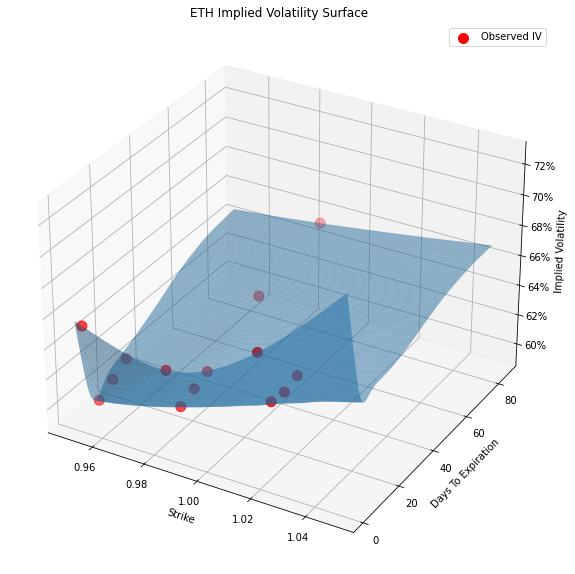

In [16]:
# Interpolate implied volatility using a cubic spline
# Then plot the implied volatility surface

option_data_ = option_data.iloc[1:].sort_values(['t','strike']).query('t>0')
x = (option_data['last_price'][0]/option_data_['strike'])
y = option_data_['t']
z = option_data_['mark_iv']/100

X,Y = np.meshgrid(np.linspace(.95,1.05,99),np.linspace(1,np.max(y),100))
Z = interpolate.griddata(np.array([x,y]).T,np.array(z),(X,Y), method='cubic')    # cubic spline is widely used for vol surface and curve building

xyz = pd.DataFrame({'x':x,'y':y,'z':z})
xyz = xyz.query('x>0.95 & x<1.05')
plot_iv_surf(X,Y,Z,xyz['x'],xyz['y'],xyz['z'],'Observed IV')

iv_df = pd.DataFrame(Z, index=np.linspace(10,np.max(y),100), columns=np.linspace(.95,1.05,99))

In [17]:
xyz

,x,y,z
ETH-6MAY22-2900-P,1.018517,1.0,0.6720
ETH-6MAY22-3000-C,0.984567,1.0,0.6423
ETH-6MAY22-3100-C,0.952806,1.0,0.6545
ETH-13MAY22-2900-P,1.018517,8.0,0.6325
ETH-13MAY22-3000-C,0.984567,8.0,0.6105
ETH-13MAY22-3100-C,0.952806,8.0,0.5974
ETH-20MAY22-2900-P,1.018517,15.0,0.6309
ETH-20MAY22-3000-C,0.984567,15.0,0.6145
ETH-20MAY22-3100-C,0.952806,15.0,0.6036
ETH-27MAY22-2900-P,1.018517,22.0,0.6338


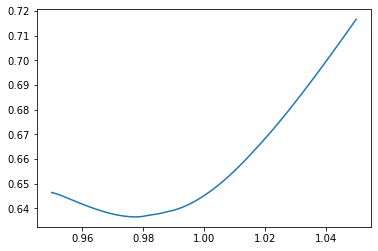

In [32]:
plt.plot(X[1], Z[1])
plt.show()

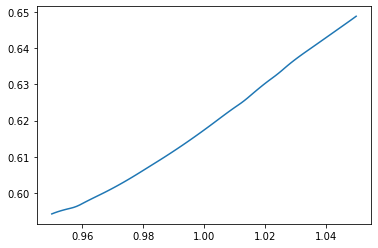

In [33]:
plt.plot(X[10], Z[10])
plt.show()

In [34]:
y

ETH-6MAY22-2200-P      1.0
ETH-6MAY22-2400-P      1.0
ETH-6MAY22-2500-P      1.0
ETH-6MAY22-2600-P      1.0
ETH-6MAY22-2700-P      1.0
                      ... 
ETH-29JUL22-2800-P    85.0
ETH-29JUL22-3000-C    85.0
ETH-29JUL22-3200-C    85.0
ETH-29JUL22-3400-C    85.0
ETH-29JUL22-3500-C    85.0
Name: t, Length: 80, dtype: float64

In [35]:
Y

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.84848485,  1.84848485,  1.84848485, ...,  1.84848485,
         1.84848485,  1.84848485],
       [ 2.6969697 ,  2.6969697 ,  2.6969697 , ...,  2.6969697 ,
         2.6969697 ,  2.6969697 ],
       ...,
       [83.3030303 , 83.3030303 , 83.3030303 , ..., 83.3030303 ,
        83.3030303 , 83.3030303 ],
       [84.15151515, 84.15151515, 84.15151515, ..., 84.15151515,
        84.15151515, 84.15151515],
       [85.        , 85.        , 85.        , ..., 85.        ,
        85.        , 85.        ]])